In [4]:
!pip install fbprophet

In [3]:
!wget https://github.com/mkrish14/datasets/blob/master/kbs_covid_eda.zip

--2020-04-19 08:05:06--  https://github.com/mkrish14/datasets/blob/master/kbs_covid_eda.zip
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘kbs_covid_eda.zip’

kbs_covid_eda.zip       [ <=>                ]  65.83K  --.-KB/s    in 0.01s   

2020-04-19 08:05:06 (5.04 MB/s) - ‘kbs_covid_eda.zip’ saved [67415]



In [4]:
!git clone https://github.com/mkrish14/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [5]:
!ls

datasets  kbs_covid_eda.zip  sample_data


In [6]:
%cd datasets/

/content/datasets


In [7]:
!ls

kbs_covid_eda.zip  README.md


In [8]:
!unzip kbs_covid_eda.zip

Archive:  kbs_covid_eda.zip
  inflating: kbs_covid_eda.csv       


In [9]:
!ls

kbs_covid_eda.csv  kbs_covid_eda.zip  README.md


In [0]:
import pandas as pd

df1 = pd.read_csv('kbs_covid_eda.csv')

In [73]:
df1.head()

,location,county,ship,case_type,cases,country,date,difference,latitude,longitude,state
0,Autauga,Autauga,False,Confirmed,0,US,1/22/2020,NaN,32.539527,-86.644082,Alabama
1,Baldwin,Baldwin,False,Confirmed,0,US,1/22/2020,NaN,30.727750,-87.722071,Alabama
2,Barbour,Barbour,False,Confirmed,0,US,1/22/2020,NaN,31.868263,-85.387129,Alabama
3,Bibb,Bibb,False,Confirmed,0,US,1/22/2020,NaN,32.996421,-87.125115,Alabama
4,Blount,Blount,False,Confirmed,0,US,1/22/2020,NaN,33.982109,-86.567906,Alabama


In [0]:
# Categorical boolean mask
categorical_feature_mask = df1.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df1.columns[categorical_feature_mask].tolist()

In [75]:
print(categorical_feature_mask.to_list())
df1.columns

[True, True, False, True, False, True, True, False, False, False, True]


Index(['location', 'county', 'ship', 'case_type', 'cases', 'country', 'date',
       'difference', 'latitude', 'longitude', 'state'],
      dtype='object')

In [0]:
cols = ['location', 'county','ship','case_type','country','state']
df1[cols]=df1[cols].apply(lambda x: pd.factorize(x)[0])

In [0]:
df1['difference'].fillna(0, inplace=True)

In [78]:
df1.date = pd.to_datetime(df1.date, format='%m/%d/%Y')
# df1.date = pd.to_datetime(df['date'].dt.strftime('%m/%d/%Y'))
df1.head()

,location,county,ship,case_type,cases,country,date,difference,latitude,longitude,state
0,0,0,0,0,0,0,2020-01-22,0.0,32.539527,-86.644082,0
1,1,1,0,0,0,0,2020-01-22,0.0,30.727750,-87.722071,0
2,2,2,0,0,0,0,2020-01-22,0.0,31.868263,-85.387129,0
3,3,3,0,0,0,0,2020-01-22,0.0,32.996421,-87.125115,0
4,4,4,0,0,0,0,2020-01-22,0.0,33.982109,-86.567906,0


In [79]:
df1.dtypes

location               int64
county                 int64
ship                   int64
case_type              int64
cases                  int64
country                int64
date          datetime64[ns]
difference           float64
latitude             float64
longitude            float64
state                  int64
dtype: object

In [0]:
prophetcol  = df1[['date','cases'].copy()]
grouped_df = prophetcol.groupby('date',as_index=False).cases.sum()


In [81]:
grouped_df.columns

Index(['date', 'cases'], dtype='object')

In [82]:
grouped_df.head()

,date,cases
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5


In [0]:
grouped_df = grouped_df.rename(columns={'date':'ds','cases':'y',})

In [85]:
grouped_df.tail()

,ds,y
70,2020-04-01,217964
71,2020-04-02,249224
72,2020-04-03,282514
73,2020-04-04,317097
74,2020-04-05,346529


In [0]:
df =grouped_df

In [0]:
from fbprophet import Prophet

In [88]:
df.columns

Index(['ds', 'y'], dtype='object')

In [89]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [90]:
future = m.make_future_dataframe(periods=20)
future.tail()

,ds
90,2020-04-21
91,2020-04-22
92,2020-04-23
93,2020-04-24
94,2020-04-25


In [0]:
forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail

In [92]:
forecast[['ds', 'yhat']].tail

<bound method NDFrame.tail of            ds           yhat
0  2020-01-22   -2914.614141
1  2020-01-23   -1534.284341
2  2020-01-24      32.162490
3  2020-01-25    2025.336858
4  2020-01-26    1810.269454
..        ...            ...
90 2020-04-21  618721.445209
91 2020-04-22  638969.467509
92 2020-04-23  660159.951346
93 2020-04-24  681536.552213
94 2020-04-25  703339.880624

[95 rows x 2 columns]>

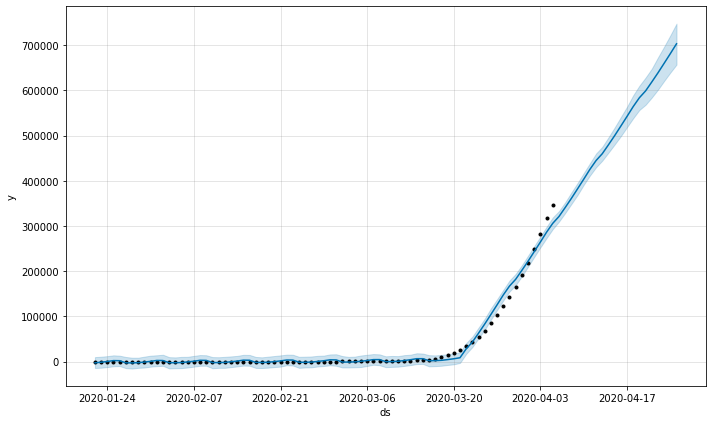

In [93]:
fig1 = m.plot(forecast)


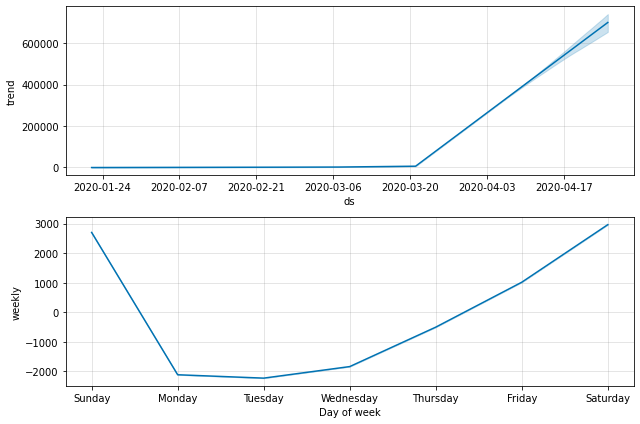

In [94]:
fig2 = m.plot_components(forecast)


In [0]:
# from fbprophet.plot import plot_plotly
# import plotly.offline as py
# py.init_notebook_mode()

# fig = plot_plotly(m, forecast)  # This returns a plotly Figure
# py.iplot(fig)
